<a href="https://colab.research.google.com/github/Phani1615/iris-classification/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [4]:
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df["target"].value_counts()


0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [7]:
sns.set(style="white", color_codes=True)

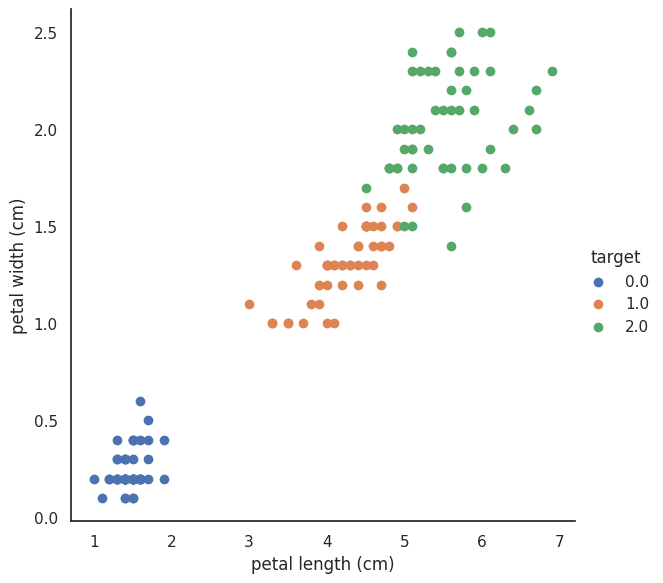

In [12]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()


In [13]:
model = GaussianNB()
model.fit(iris.data, iris.target)

GaussianNB()

In [14]:
model.score(iris.data, iris.target)


0.96

In [15]:
expected = iris.target
predicted = model.predict(iris.data)

In [16]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(iris.data, iris.target)
expected = iris.target
predicted = model.predict(iris.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


In [18]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(iris.data, iris.target)
expected = iris.target
predicted = model.predict(iris.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

[[50  0  0]
 [50  0  0]
 [50  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
def Naive_bayes(Model_Type):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        if(Model_Type=='Gaussian'):
            model =  GaussianNB()
        elif (Model_Type=='Multinomial'):
                model =  MultinomialNB()
        else:
                model =  BernoulliNB()

        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [20]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [21]:
i = interact(Naive_bayes, Model_Type=['Gaussian','Multinomial','Bernoulli'])


interactive(children=(Dropdown(description='Model_Type', options=('Gaussian', 'Multinomial', 'Bernoulli'), val…